In [65]:
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline
import glob
plt.rcParams['image.cmap'] = 'gray'
from osgeo import gdal
from google.colab import drive
drive.mount('/content/drive')
!pip install rasterio

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


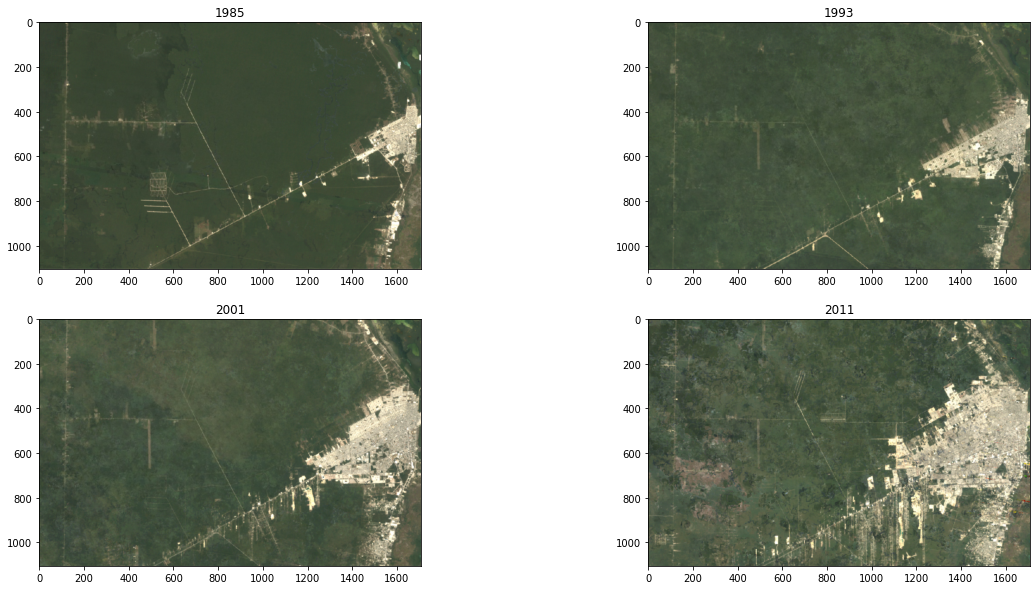

In [66]:
# Reading first screenshot.
image1 = cv2.imread('/content/drive/MyDrive/My_Data_Set/satellite_imgs/Images/1985.png')
image2 = cv2.imread('/content/drive/MyDrive/My_Data_Set/satellite_imgs/Images/1993.png')
image3 = cv2.imread('/content/drive/MyDrive/My_Data_Set/satellite_imgs/Images/2001.png')
image4 = cv2.imread('/content/drive/MyDrive/My_Data_Set/satellite_imgs/Images/2011.png')


fig = plt.figure(figsize=[20, 10])

ax = fig.add_subplot(2, 2, 1)
ax.set_title('1985')
plt.imshow(image1[:, :, ::-1])

ax = fig.add_subplot(2, 2, 2)
ax.set_title('1993')
plt.imshow(image2[:, :, ::-1])

ax = fig.add_subplot(2, 2, 3)
ax.set_title('2001')
plt.imshow(image3[:, :, ::-1])

ax = fig.add_subplot(2, 2, 4)
ax.set_title('2011')
plt.imshow(image4[:, :, ::-1])

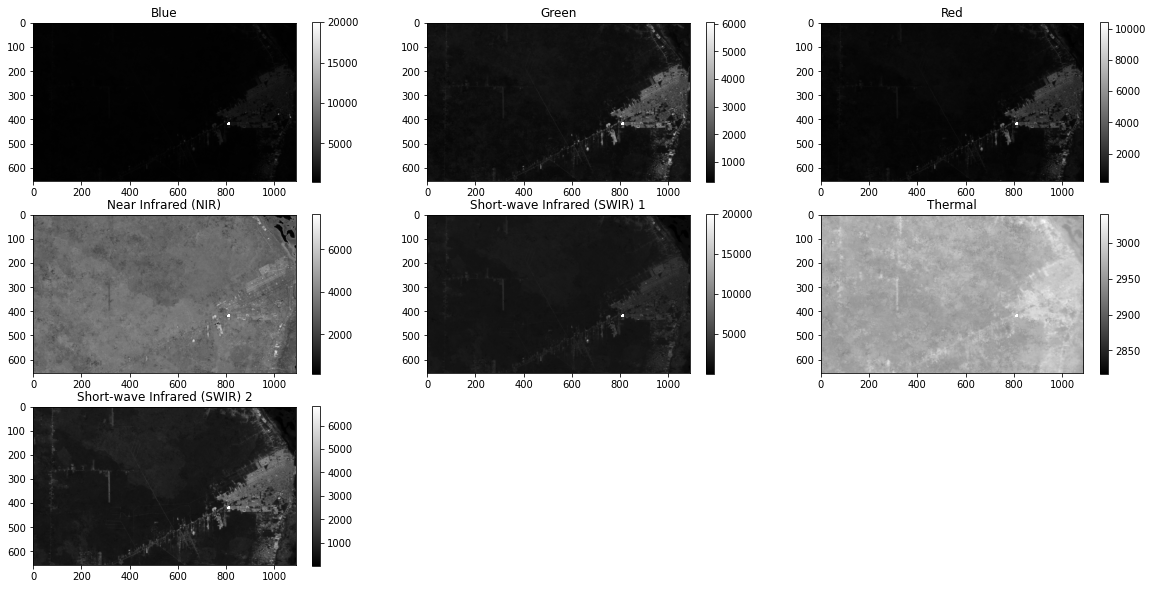

In [3]:
ds = gdal.Open('/content/drive/MyDrive/My_Data_Set/satellite_imgs/deforestation/2001api.tif')
plt.figure(figsize = (20,10))
plt.subplot(331); plt.imshow(ds.GetRasterBand(1).ReadAsArray()); plt.title("Blue"); plt.colorbar();
plt.subplot(332); plt.imshow(ds.GetRasterBand(2).ReadAsArray()); plt.title("Green"); plt.colorbar();
plt.subplot(333); plt.imshow(ds.GetRasterBand(3).ReadAsArray()); plt.title("Red"); plt.colorbar();
plt.subplot(334); plt.imshow(ds.GetRasterBand(4).ReadAsArray()); plt.title("Near Infrared (NIR)"); plt.colorbar();
plt.subplot(335); plt.imshow(ds.GetRasterBand(5).ReadAsArray()); plt.title("Short-wave Infrared (SWIR) 1"); plt.colorbar();
plt.subplot(336); plt.imshow(ds.GetRasterBand(6).ReadAsArray()); plt.title("Thermal"); plt.colorbar();
plt.subplot(337); plt.imshow(ds.GetRasterBand(7).ReadAsArray()); plt.title("Short-wave Infrared (SWIR) 2"); plt.colorbar();


In [9]:
def get_NDVI(ds):
  r = ds.GetRasterBand(3).ReadAsArray()
  nir = ds.GetRasterBand(4).ReadAsArray()
  ndvi = (nir - r)/(nir + r)
  # print("NDVI ->", ndvi)
  ndvi = normalize255(ndvi)
  # print("Normalized NDVI ->", ndvi)
  return ndvi

# Normalize ndvi from (-1, 1) to (0, 255)
def normalize255(ndvi):
  ndvi = ndvi + 1
  ndvi = (ndvi / 2) * 255
  return ndvi

In [10]:
def get_NDVI_mask(ndvi):
  _, mask = cv2.threshold(ndvi, 200, 255, cv2.THRESH_BINARY)
  # print("NDVI Mask ->", mask)
  return mask

In [24]:
# Calculate the percentage of forestation using the generated mask
def percent_forest(mask):
  c = cv2.countNonZero(mask)
  t = mask.shape[0] * mask.shape[1]
  return round((c / t) * 100, 4)

In [60]:
def plot_NDVI(path):
  ds = gdal.Open(path)
  ndvi = get_NDVI(ds)
  ndvi_mask = get_NDVI_mask(ndvi)
  #-------------------------------------------------
  year = path.split('.')[0][-7:-3]
  #------------------------------------------------
  fig = plt.figure(figsize = (20, 5))
  fig = plt.subplot(1, 2, 1)
  plot = plt.imshow(ndvi, cmap = "gray")
  plt.colorbar()
  plt.title(year + ": " + "NDVI") 
  plt.xticks([]), plt.yticks([])
  fig = plt.subplot(1, 2, 2)
  plot = plt.imshow(ndvi_mask, cmap = "gray"); 
  plt.title(str(percent_forest(ndvi_mask)) + "%") 
  plt.xticks([]), plt.yticks([])
  plt.show()

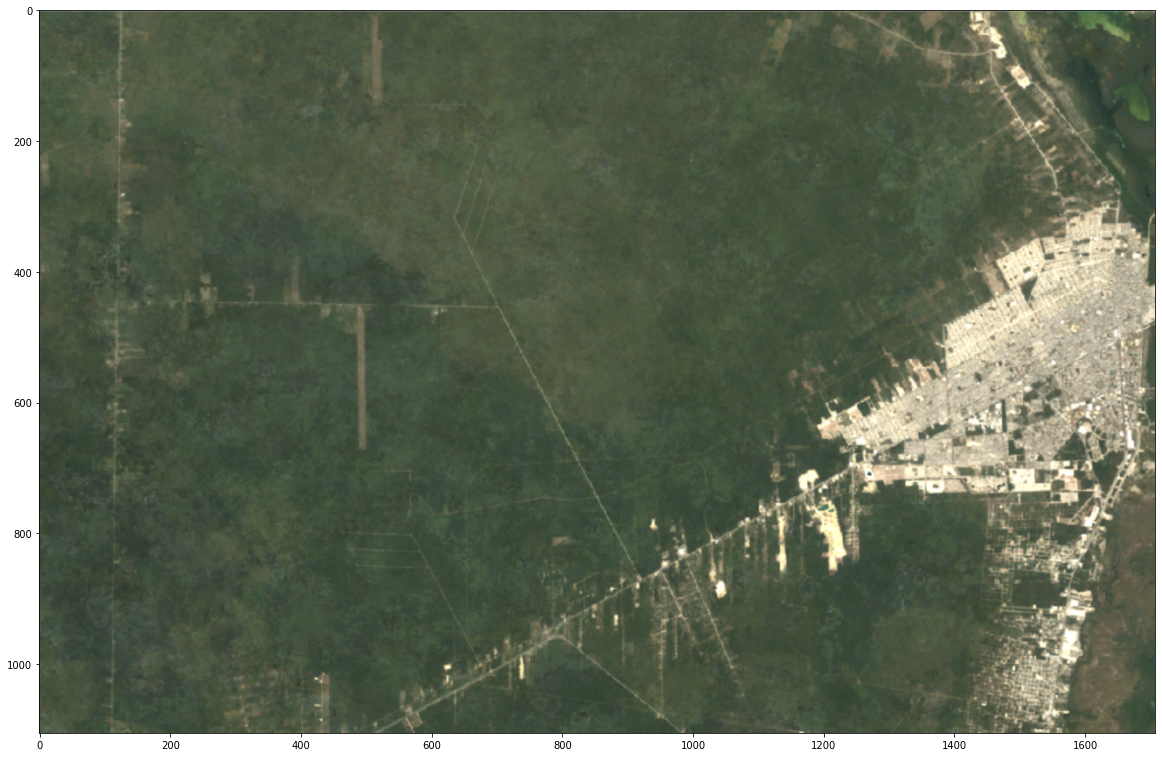

In [74]:
image_smpl = cv2.imread('/content/drive/MyDrive/My_Data_Set/satellite_imgs/Images/1985.png')  #1985 ,1993, 2001, 2011


fig = plt.figure(figsize=[20, 20])
plt.imshow(image_smpl[:, :, ::-1])

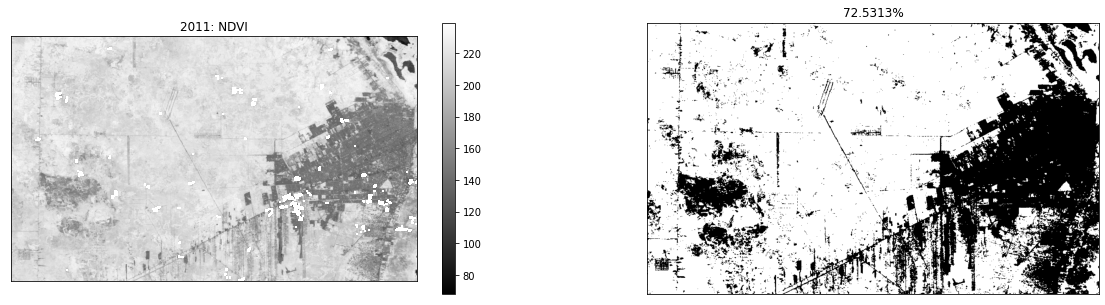

In [61]:
plot_NDVI('/content/drive/MyDrive/My_Data_Set/satellite_imgs/deforestation/2011api.tif')

['/content/drive/MyDrive/My_Data_Set/satellite_imgs/deforestation/1985api.tif', '/content/drive/MyDrive/My_Data_Set/satellite_imgs/deforestation/1993api.tif', '/content/drive/MyDrive/My_Data_Set/satellite_imgs/deforestation/2001api.tif', '/content/drive/MyDrive/My_Data_Set/satellite_imgs/deforestation/2011api.tif']


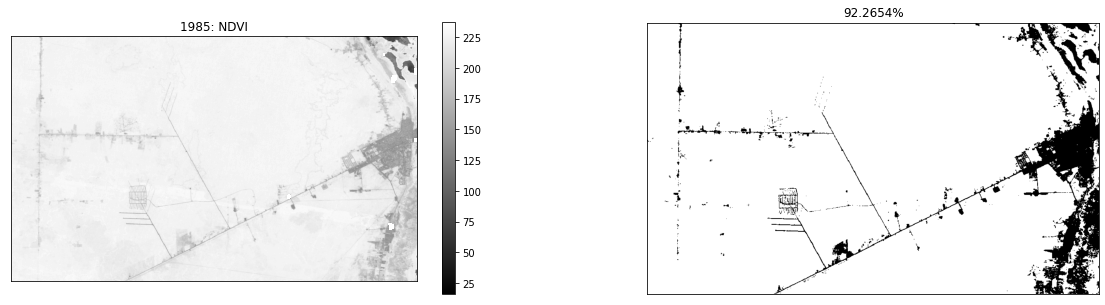

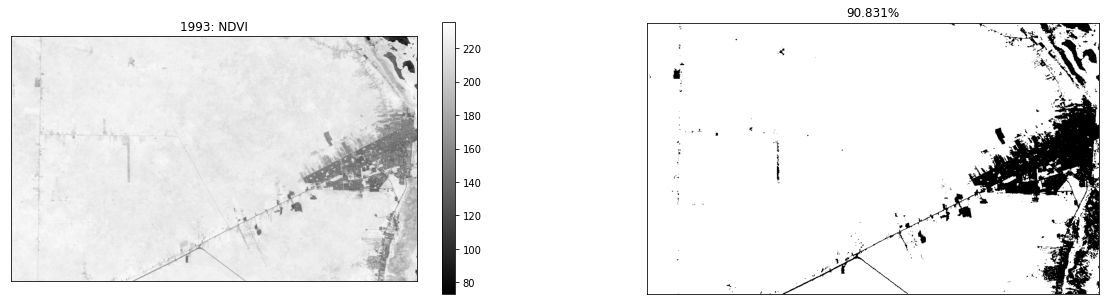

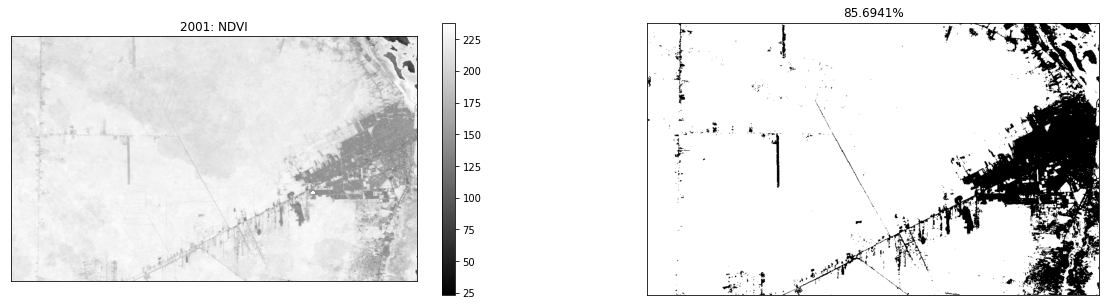

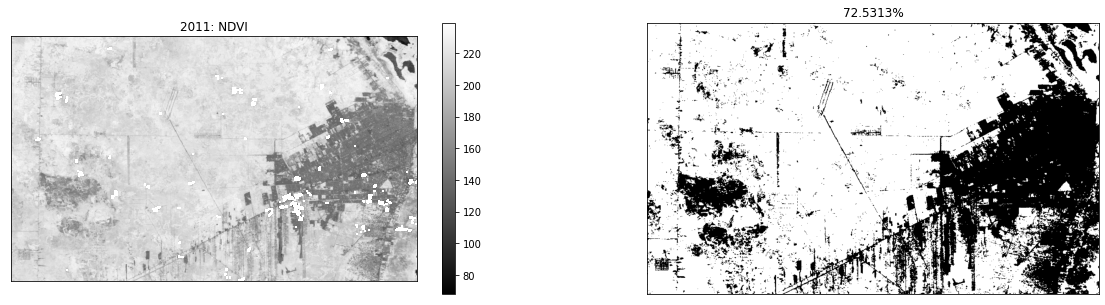

In [67]:
path = "/content/drive/MyDrive/My_Data_Set/satellite_imgs/deforestation"
geotiff_files = glob.glob(path + "/*.tif")
print(geotiff_files)
geotiff_files.sort()
for file in geotiff_files:
  plot_NDVI(file)